# Proyecto Big data 

# Librerias utilizadas 

In [2]:
#
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LSTM
print("Versión de Tensorflow: ", tf.__version__)


Versión de Tensorflow:  2.3.0


# Función auxiliar para el ploteo final

In [3]:
# Funciones auxiliares
#
def plot_prediction(real, prediccion):
    plt.plot(real,color='red', label='Valor real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

#

# Importar Datos

In [4]:
df2= pd.read_csv("PanelFiltrado.csv", delimiter=",", error_bad_lines=False, header=0, decimal=",")
df2.index=pd.to_datetime(df2["Fecha"])

In [5]:
df2

,Fecha,Fuente,Estación,EstaciónID,Año,Mes,Día,Hora,Unidad,PM10,PM2.5
Fecha,,,,,,,,,,,
2015-01-01 01:00:00,2015-01-01 01:00:00,RMCAB,Bolivia,1,2015,1,1,1,mg/m3,NaN,NaN
2015-01-01 02:00:00,2015-01-01 02:00:00,RMCAB,Bolivia,1,2015,1,1,2,mg/m3,NaN,NaN
2015-01-01 03:00:00,2015-01-01 03:00:00,RMCAB,Bolivia,1,2015,1,1,3,mg/m3,NaN,NaN
2015-01-01 04:00:00,2015-01-01 04:00:00,RMCAB,Bolivia,1,2015,1,1,4,mg/m3,NaN,NaN
2015-01-01 05:00:00,2015-01-01 05:00:00,RMCAB,Bolivia,1,2015,1,1,5,mg/m3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08 12:00:00,2021-04-08 12:00:00,RMCAB,Usme,18,2021,4,8,12,mg/m3,NaN,3.4
2021-04-08 13:00:00,2021-04-08 13:00:00,RMCAB,Usme,18,2021,4,8,13,mg/m3,NaN,7.6
2021-04-08 14:00:00,2021-04-08 14:00:00,RMCAB,Usme,18,2021,4,8,14,mg/m3,NaN,6.5


# Se analizan las Estaciones que hay y la cantidad de datos que se tienen por cada una

In [7]:
df2["Estación"].value_counts()

Fontibón                      54952
Móvil Fontibón                54952
Guaymaral                     54952
Puente Aranda                 54952
Colina                        54952
Bosa                          54952
Suba                          54952
Usme                          54952
Kennedy                       54952
Ciudad Bolívar                54952
Tunal                         54952
San Cristóbal                 54952
Usaquén                       54952
Centro de Alto Rendimiento    54952
Carvajal-Sevillana            54952
Ministerio de Ambiente        54952
Las Ferias                    54952
Bolivia                       54952
Name: Estación, dtype: int64

# La siguiente función selecciona una estacion en particular en un determinado de tiempo

In [23]:
def Estacion(s,a,b):
    ESTACION=df2[df2["Estación"]==s]
    ESTACION=ESTACION[["PM10","PM2.5","Fecha"]]
    ESTACION[["PM10","PM2.5"]]=ESTACION[["PM10","PM2.5"]].astype("float")
    ESTACION=ESTACION.loc[a:b]
    #TUNALAÑO2019MARZOSEMANA1=Tunal.loc['2019-03-04 00:00:00':'2019-03-10 23:00:00']
    #TUNALAÑO2019MARZOSEMANA1.plot(title="Concentración de PM10 y P.25 en Tunal- Mes Marzo de 2019",figsize=(15,4))
    ESTACION.plot(title="Concentración de PM10 y P.25 en {}- entre {} y {}".format(s,a,b),figsize=(20,4))
    return ESTACION
 

# Se selecciona que tipo de PM se va a analizar

In [24]:
def SelectPM(s,a,b,PM):
    SelectEstacion=Estacion(s,a,b)
    SelectEstacionPM= pd.DataFrame(SelectEstacion[[PM]])
    SelectEstacionPM= SelectEstacionPM.dropna()
    print(len(SelectEstacionPM))
    # plot
    plt.figure(figsize=(16,8))
    plt.plot(SelectEstacionPM[:int(len(SelectEstacionPM)*80/100)], label="Conjunto de entrenamiento (Training set): {} puntos (80%)".format(int(len(SelectEstacionPM)*80/100)))
    plt.plot(SelectEstacionPM[int(len(SelectEstacionPM)*80/100):], label='Conjunto de Validación (Validation set): {} puntos (20%)'.format(int(len(SelectEstacionPM)-len(SelectEstacionPM)*80/100)))#248 data
    plt.title("Concentración de {} en {} entre {} y {}".format(PM,s,a,b), size=(20))
    plt.legend()
    plt.show()
    return SelectEstacionPM
    

# La siguiente funcion hace la prediccion de la cantidad de PM que se haya seleccionado anteriormente

**Observaciones:** 
1) Del conjunto de datos que se toma se toma el 80% primero de los datos como entrenamiento y el 20% como testeo.
2) Muchachos si pueden modificar parte del codigo para que haga mejores predicciones seria severo o si le pueden meter mas cosas o correr otro codigo. Por ahora solo corri dos predicciones una en las ferias y otra en el tunal para marzo del 2019
3) para correr el codigo se llama la función Red Neuronal que a su vez ya llama las otras que se definen arriba :v
4) La funcion devuelve los datos observados con los predichos en un dataframe

**Asi se corre**
# RedNeuronal("Aca se escribe el nombre de la estacion",'Fecha inicial acorde al dataframe','Fecha final acorde al dataframe',"Tipo de PM")

**Ejemplo** 

# FERIAS=RedNeuronal("Las Ferias",'2019-03-04 00:00:00','2019-04-01 00:00:00',"PM2.5")

In [39]:
def RedNeuronal(s,a,b,PM):
    SUPERDATA=SelectPM(s,a,b,PM)
    #creating train and test sets
    dataset = SUPERDATA.values
    # create the scaler object and scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    
    # tamaños para entrenamiento y validación
    len_train = int(len(SUPERDATA)*80/100) # 80%
    len_valid = len(SUPERDATA)-int(len(SUPERDATA)*80/100)# 20%
    len_data = len_train + len_valid
    # 
    # Longitud de las tiras de datos para hacer las predicciones
    time_step = 60
    # días a predecir
    days = 1
    #
    # crea datos de entrenamiento
    x_train, y_train = [], []
    #
    for i in range(time_step ,len_train ):
        # x: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
        x_train.append(scaled_data[i-time_step :i,0])
        # y: el siguiente dato
        y_train.append(scaled_data[i:i+days,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    #
    #
    # Arregla el tamaño, porque la capa LSTM espera tensores de tres dimensiones: 
    # (batch, longitud de la tira de datos, número de features)
    # Como es una serie univariada solamente hay 1 feature.
    #
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    y_train = np.reshape(y_train, (y_train.shape[0],y_train.shape[1],1))
    #
    print(x_train.shape)
    print(y_train.shape)
    # unidades de salida de las capas LSTM
    #
    units = 70
    #
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1],1)),
        tf.keras.layers.LSTM(units=units),
        tf.keras.layers.Dense(1)])
    model.summary()
    
    model.compile(loss='mse', optimizer='adam')
    history = model.fit(x_train,y_train,epochs=20,batch_size=32)
    
    plt.plot(history.history['loss'], label='train')
    plt.legend();
    
    inputs = SUPERDATA[len_data - len_valid - time_step:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    x_test = []
    y_test = []

    # aqui vamos

    for i in range(time_step,inputs.shape[0]):
        x_test.append(inputs[i-time_step:i,0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    
    
    x_test.shape
    
    # predictions
    prediction = model.predict(x_test)
    prediction = scaler.inverse_transform(prediction)
    
    prediction.shape
    
    # Graficar resultadosdata[len_data - len_valid - time_step:].valuesdata['Close'][987:]
    set_validation = SUPERDATA[len_data - len_valid :].values
    plot_prediction(set_validation ,prediction)
    
    train = pd.DataFrame(SUPERDATA[:len_train])
    valid = pd.DataFrame(SUPERDATA[len_train:])
    valid['Predictions'] = prediction
    
    np.sqrt(np.mean(np.power(valid["PM2.5"].values-valid['Predictions'].values,2)))
    rmsLSTM = np.sqrt(np.mean(np.power(valid["PM2.5"].values-valid['Predictions'].values,2)))
    rmsLSTM 
    
    #for plotting
    rmsLSTM = np.sqrt(np.mean(np.power(valid["PM2.5"].values-valid['Predictions'].values,2)))

    train = pd.DataFrame(SUPERDATA[:len_train])
    valid = pd.DataFrame(SUPERDATA[len_train:])

    valid['Predictions'] = prediction
    plt.plot(train["PM2.5"])
    plot = plt.plot(valid[["PM2.5",'Predictions']])
    #plt.annotate("rms = "+str(rmsLSTM) , xy=(SUPERDATA.index[1],300), size = 15)
    plt.legend(plot, ("Observado","Predicho"))
    plt.title("Concentración de {} en {} entre {} y {}".format(PM,s,a,b), size = 30)
    plt.show()
    return valid

    

In [ ]:
#

653


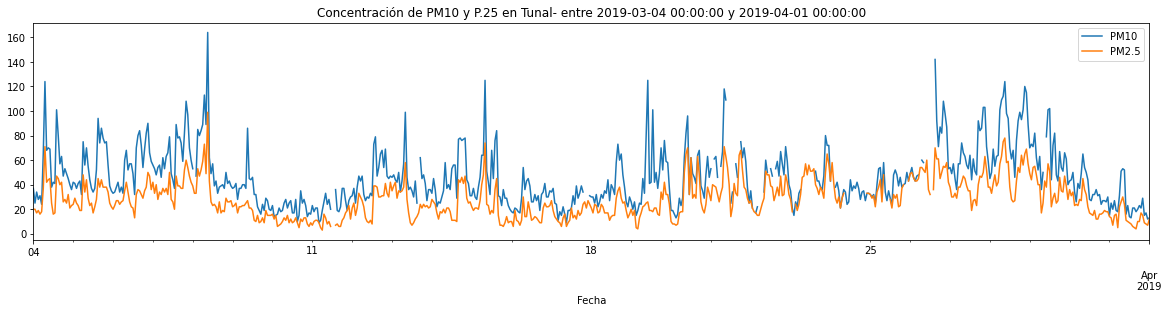

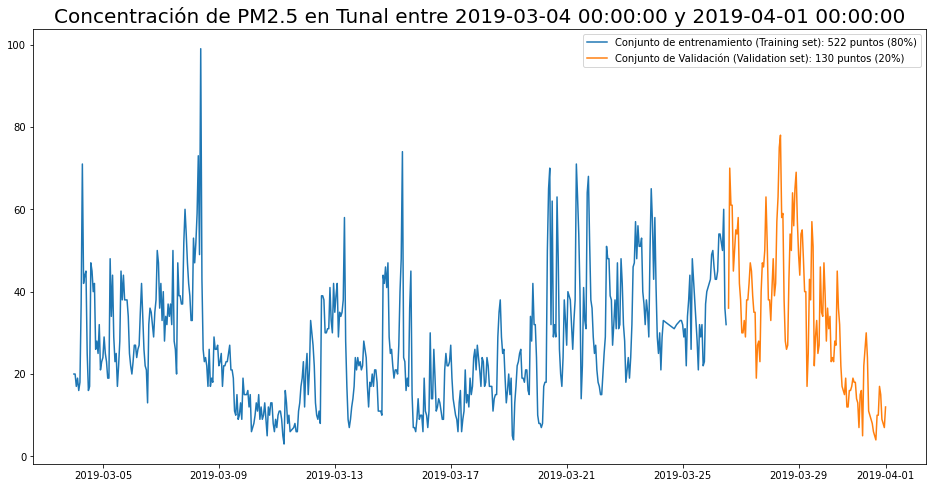

(462, 60, 1)
(462, 1, 1)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 60, 70)            20160     
_________________________________________________________________
lstm_15 (LSTM)               (None, 70)                39480     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 71        
Total params: 59,711
Trainable params: 59,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
15/15 [==============================] - 1s 99ms/step - loss: 0.0351
Epoch 2/20
15/15 [==============================] - 1s 80ms/step - loss: 0.0188
Epoch 3/20
15/15 [==============================] - 2s 105ms/step - loss: 0.0162
Epoch 4/20
15/15 [==============================] - 1s 89ms/step - loss: 0.0157
Epoch 5/20
15/15 [================

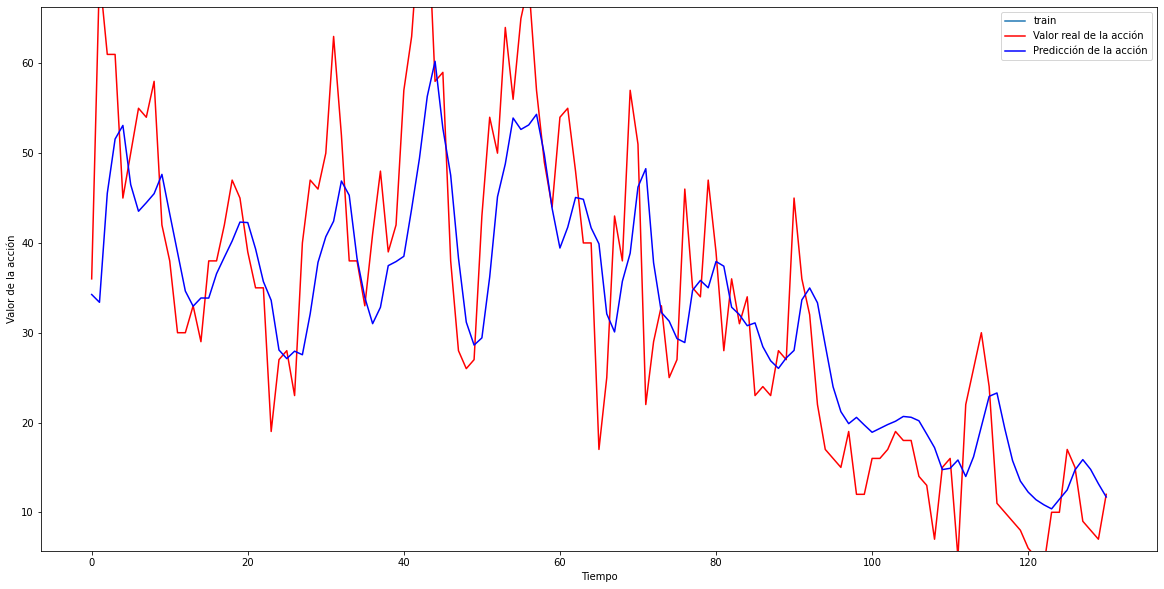

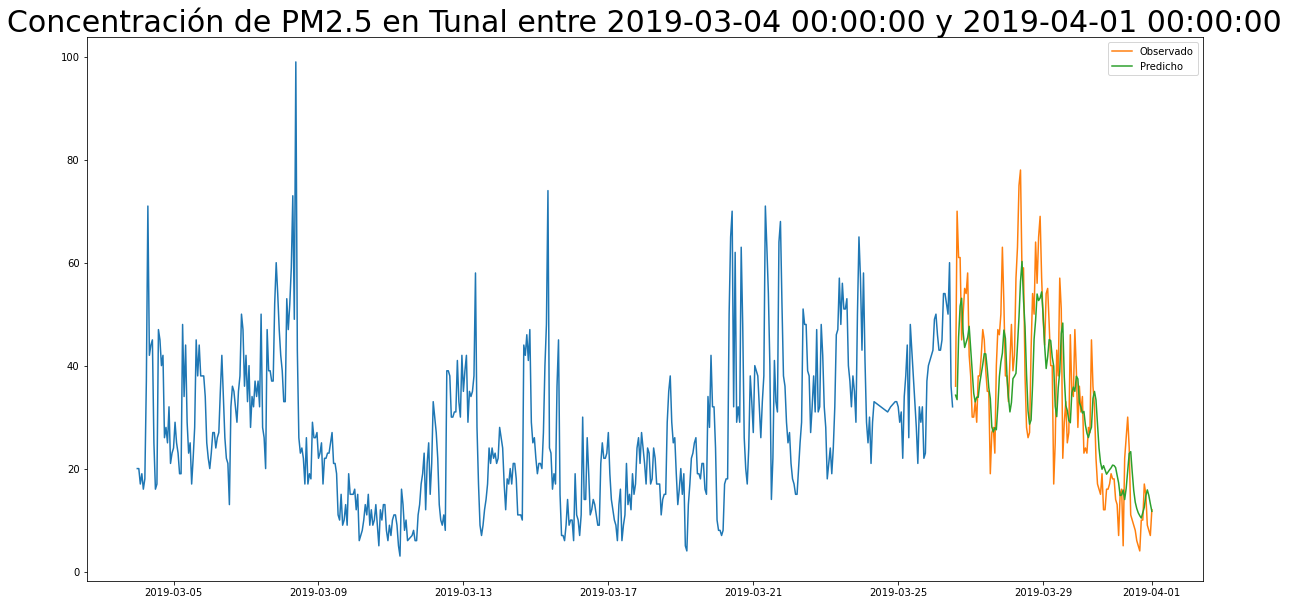

In [40]:
TUNAL=RedNeuronal("Tunal",'2019-03-04 00:00:00','2019-04-01 00:00:00',"PM2.5")

In [41]:
TUNAL

,PM2.5,Predictions
Fecha,,
2019-03-26 14:00:00,36.0,34.257076
2019-03-26 15:00:00,70.0,33.388439
2019-03-26 16:00:00,61.0,45.530518
2019-03-26 17:00:00,61.0,51.572121
2019-03-26 18:00:00,45.0,53.087982
...,...,...
2019-03-31 20:00:00,15.0,14.712888
2019-03-31 21:00:00,9.0,15.865540
2019-03-31 22:00:00,8.0,14.778917


671


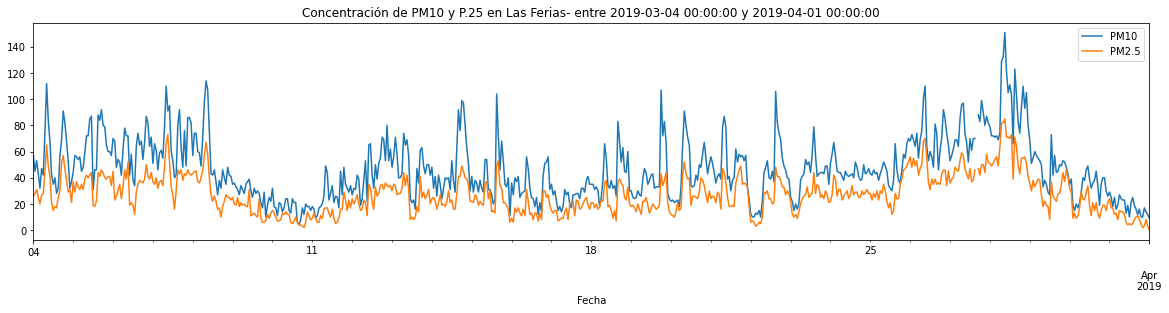

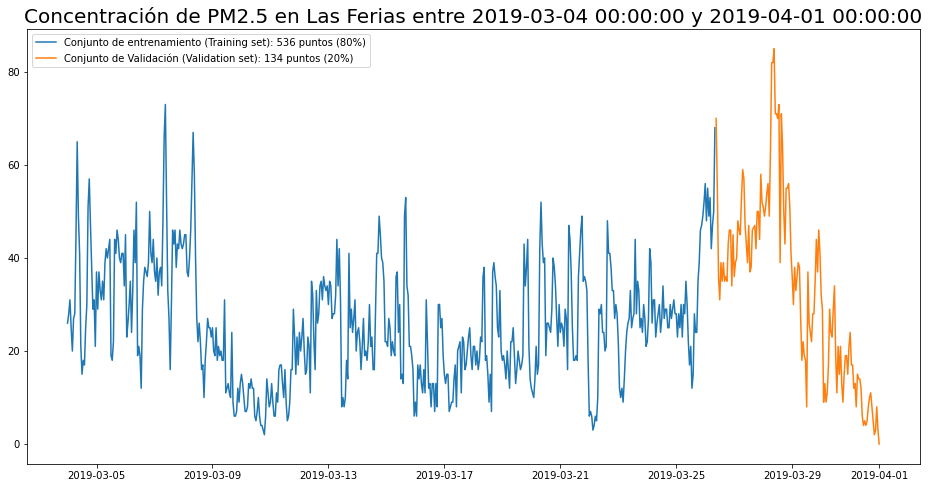

(476, 60, 1)
(476, 1, 1)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 70)            20160     
_________________________________________________________________
lstm_17 (LSTM)               (None, 70)                39480     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 71        
Total params: 59,711
Trainable params: 59,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
15/15 [==============================] - 1s 75ms/step - loss: 0.0286
Epoch 2/20
15/15 [==============================] - 1s 75ms/step - loss: 0.0157
Epoch 3/20
15/15 [==============================] - 1s 75ms/step - loss: 0.0147
Epoch 4/20
15/15 [==============================] - 1s 75ms/step - loss: 0.0143
Epoch 5/20
15/15 [=================

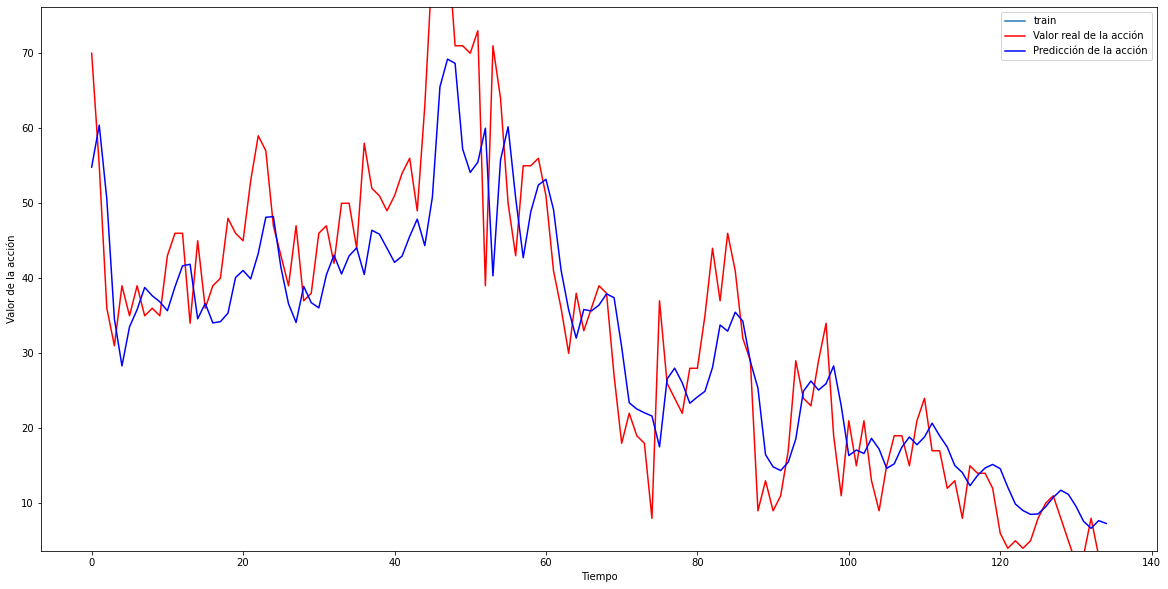

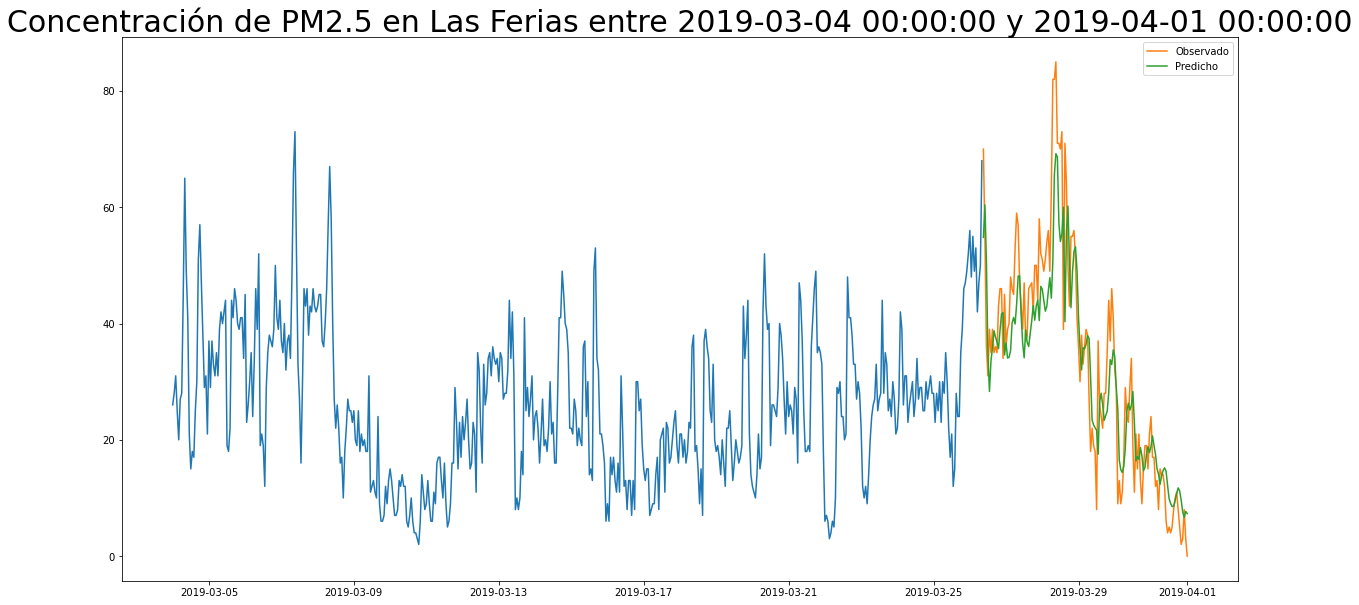

In [43]:
FERIAS=RedNeuronal("Las Ferias",'2019-03-04 00:00:00','2019-04-01 00:00:00',"PM2.5")

In [44]:
FERIAS

,PM2.5,Predictions
Fecha,,
2019-03-26 09:00:00,70.0,54.822895
2019-03-26 10:00:00,55.0,60.415310
2019-03-26 11:00:00,36.0,50.550152
2019-03-26 12:00:00,31.0,34.576687
2019-03-26 13:00:00,39.0,28.318806
...,...,...
2019-03-31 20:00:00,2.0,9.602788
2019-03-31 21:00:00,3.0,7.607931
2019-03-31 22:00:00,8.0,6.659775
